### Analyse OECD data on nr of worked hours

In [2]:
import pandas as pd

### 1. Get and restructure data

In [3]:
# import OECD data as DataFrame
data_oecd = "./DP_LIVE_25022019170559476.csv"
df_oecd = pd.read_csv(data_oecd, usecols=['LOCATION', 'TIME', 'Value'])
# rename to use better words
df_oecd.rename({"LOCATION":"country", "TIME": "year", "Value": "hours"}, axis='columns', inplace=True)
df_oecd.head()


,country,year,hours
0,AUS,1979,1832.3
1,AUS,1980,1830.9
2,AUS,1981,1816.8
3,AUS,1982,1792.5
4,AUS,1983,1779.1


In [4]:
# Restructure dataframe, make year the index
df_year = df_oecd.set_index(['year']) 

In [5]:
# store countries and years in series
countries = df_year['country'].unique()
years = df_year.index.unique().sort_values()

In [6]:
# prepare to make new dataframe with one row per year and one column per country
# 1. create each countries series
all_series = []
for country in countries:
    all_series.append(df_year[df_year.country == country].hours)
    all_series[-1].name = country

In [7]:
# 2. Create new DataFrame with index only
df = pd.DataFrame(index = years)

In [12]:
# 3. Fill new dataframe with country series
for country_series in all_series: df[country_series.name] = country_series
df.iloc[0:10]

,AUS,AUT,BEL,CAN,CZE,DNK,FIN,FRA,DEU,GRC,...,USA,CHL,EST,ISR,RUS,SVN,OECD,LVA,LTU,CRI
year,,,,,,,,,,,,,,,,,,,,,
1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2193.32,NaN,NaN,...,1968.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2214.49,NaN,NaN,...,1986.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2197.78,NaN,NaN,...,1988.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2179.01,NaN,NaN,...,1992.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2193.64,NaN,NaN,...,1984.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2179.04,NaN,NaN,...,2003.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2130.53,NaN,NaN,...,2002.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2107.13,NaN,NaN,...,1973.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2096.43,NaN,NaN,...,1947.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### DONE getting a nice DataFrame. Now we can do stuff.

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

#### Compare Sweden to USA

<Figure size 432x288 with 0 Axes>

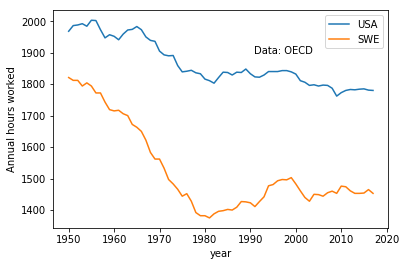

In [17]:
# Plot
fig = plt.figure()
ax = df.plot.line(y=['USA','SWE'])
ax.set(ylabel='Annual hours worked')
plt.text(0.6, 0.8, "Data: OECD", transform=ax.transAxes)
plt.savefig("hours-worked.pdf")
#ax.savefig("hours-worked.pdf")